# **Формирование рекомендаций по привлечению подписчиков в телеграмм канал Кинопоиска.**

## Часть 1. Подготовка данных и предобработка



<font size = 4> **Оглавление**</font>
1. [Постановка задачи и ход исследования](#start)
2. [Импорт библиотек](#library)
3. [Загрузка и подготовка данных к анализу](#prepare)
4. [Предварительная обработка данных](#4)
5. [Выводы](#8)

<a id="#start"></a>
## 1 Постановка задачи и ход исследования

**Общее описание задачи**:
- Выявить наиболее эффективные и точные метрики для еженедельного/ежемесячного анализа работы.
- Сформировать список KPI для дальнейшей работы и отслеживания заказчиком совместно с маркетологами.

~1. Анализ нынешнего состояния телеграм-канала города~
~2. Выявление эффективных и неэффективных публикаций для привлечения аудитории.~

**Цель:**
Привлечение подписчиков в телеграмм канал Кинопоиска.


**В исследовании:**
- Произведем загрузку в рабочую папку предоставленных таблиц
- Проведем исследовательский анализ данных
- Выявим и изучим темы постов Кинопоиска
- Выведем метрики эффективности поста:
    - Тип публикации - наличие приложенного фото/видео, ссылки, документа или ничего не приложено
    - Тема - поскольку Заказчик не предоставил темы своих публикаций - произведем классификацию исходя из текста постов
    - Объем текста - посчитаем количество слов и символов к каждой публикации
    - Отсутствие / наличие эмодзи
    - Отсутствие / наличие изображений, ссылок, документов
    - Знаки препинания (сложность текста)
- Построим Облако слов. Выделим наиболее часто встречающиеся слова во всех публикациях в целом. И выделим для каждой публикации (поста) количество наиболее часто встречающихся слов.
- Аналогичное исследование проведем для комментариев - выделим наиболее часто встречающиеся в комментариях слова.
- Определим зависимость популярности поста от:
  - дня месяца публикации
  - дня недели публикации
  - времени суток публикации
  - и определим в результате лучшее время для публикаций как наибольшую популярность поста
- Проведем семантический анализ комментариев к постам:
  - попытаемся выяснить, к каким действиям какие посты побуждают людей. В первую очередь нам интересна [вирусность](https://livedune.com/ru/blog/virusnyj-kontent) постов - способность контента распространяться по сети без особых усилий автора, лишь потому что он зацепил пользователей и **они сами охотно его репостят, отправляют друзьям и обсуждают.**
- Призведем анализ реакций читателей на сообщения.   
  - Определим самые популярные темы (по наибольшему количеству реакций и эмодзи - как положительных, так и отрицательных)
  - Определим минимально популярные темы (наименьшее количество реакций и эмодзи)
- Проведем Анализ эмодзи. Аналогично предыдущему пункту посчитаем количество эмодзи в зависимости от темы, типа публикаций, использованных слов, объема текста, сложностью текста.
  - При возможности установим зависимость от положительных и отрицательных эмодзи.

**Ход исследования:**
- Загрузка данных из предоставленных файлов и подготовка их к анализу
- Обработка данных, Изучение общей информации о датафрейме
- Расчет и определение дополнительных данных
- Объединение данных в сводную таблицу
- Исследовательский анализ данных
- Выводы и заключения

<a id="library"></a>
## 2 Импорт библиотек


### 2.1. Установка дистрибутивов

In [ ]:
pip install yadisk --quiet

In [ ]:
pip install --upgrade gspread --quiet

In [ ]:
pip install wordcloud pandas --quiet

In [ ]:
pip install pymorphy3 --quiet

In [ ]:
pip install pymorphy2 --quiet

In [ ]:
pip install --upgrade gspread --quiet

In [ ]:
pip install wordcloud pandas --quiet

In [ ]:
pip install wordcloud --quiet

Подгрузим две библиотеки - для работы облака в Юпитере

In [ ]:
pip install --upgrade pip --quiet

In [ ]:
pip install --upgrade Pillow --quiet

<div style="border-radius: 45px;border:solid red 14px; padding: 40px">
    
**Работая в Юпитере здесь необходимо перезапустить ядро**

### 2.2. Установка библиотек и модулей:



In [ ]:
# 1) для анализа данных
import pandas as pd
from datetime import datetime, timedelta
import numpy as np
import math

# 2) для визуализации данных
import matplotlib.pyplot as plt
import seaborn as sns

# 3) для предобработки текста текста
import string
import pymorphy2
import re
import os
from wordcloud import WordCloud

# 4) для анализа текста
import nltk
from nltk import word_tokenize # токнизатор
from nltk.corpus import stopwords # стоп-слова
from nltk.probability import FreqDist

# пакеты для языковых моделей
nltk.download('punkt')
nltk.download('stopwords')

# 5) дополнительные библиотеки
from tqdm import tqdm # декоратор для индикации
import warnings
import yadisk
import logging
import sys
import gspread
from IPython.display import display
from openpyxl import load_workbook
from openpyxl.cell.text import Font, InlineFont
from openpyxl import Workbook
from openpyxl.utils.dataframe import dataframe_to_rows
from openpyxl.styles.numbers import BUILTIN_FORMATS


from google.colab import drive
drive.mount('/content/drive')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# настройка отображения
#set_matplotlib_formats('pdf', 'svg')
#pd.set_option('max_columns', None)
pd.options.display.max_columns = 30

Подключимся к исходным данным

In [ ]:
try:
    from google.colab import auth #аутентификация в сервисах Google в среде Colab
    auth.authenticate_user() #вызывает функцию аутентификации пользователя для доступа к его учетной записи Google.
    import gspread #импортирует модуль gspread, который позволяет работать с Google Sheets через Python.
    from google.auth import default # импортирует функцию default из модуля google.auth, предоставляющую способы получения учетных данных аутентификации.
    creds, _ = default() # - использует функцию default() для получения учетных данных аутентификации и присваивает их переменной creds

    gc = gspread.authorize(creds) #использует полученные учетные данные для авторизации в gspread, создавая объект gc, который может взаимодействовать с Google Sheets через AP
except:
    pass

## 3 Загрузка и подготовка данных к анализу

**Путь к файлу** [Ссылка на данные](https://docs.yandex.ru/docs?type=docx).

Скопируем данные в свой аккаунт на Яндекс.Диск.   
Изучим данные и выполним предобработку. Есть ли в данных пропуски и дубликаты? Убедимся, что типы данных во всех колонках соответствуют сохранённым в них значениям.

Перейдем в рабочую область

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
os.getcwd()

'/content/drive/My Drive'

In [ ]:
#os.listdir()

In [ ]:
os.chdir('/content/drive/MyDrive')

Введем идентификационные данные для подключения

Получим токен для доступа к Яндекс,диску

In [ ]:
from cfg import app_id, secret_id, ya_token

In [ ]:
# получаем токен для доступа к яндекс диску

y = yadisk.YaDisk(app_id, secret_id, ya_token)

if y.check_token():
    print("Sucessfully received token!")
else:
    print("Something went wrong. Not sure how though...")

Sucessfully received token!


Создадим список файлов для загрузки с Яндекс.Диска

In [ ]:
# создаем список файлов для загрузки
list_of_files = []
for el in list(y.listdir('Мастерская_Кинопоиск/Исходники_Кинопоиск')):
    if el['path'].endswith('.csv'):
        list_of_files.append(el['path'])
print("\033[34m""\033[1m""Создан список файлов list_of_files")
list_of_files

Создан список файлов list_of_files


['disk:/Мастерская_Кинопоиск/Исходники_Кинопоиск/comments_kinopisk_2023_01_18.csv',
 'disk:/Мастерская_Кинопоиск/Исходники_Кинопоиск/kinopisk_reposts_and_mentions_2023_19_01.csv',
 'disk:/Мастерская_Кинопоиск/Исходники_Кинопоиск/kinopisk_subscribers_detailed_2024-01-18.csv',
 'disk:/Мастерская_Кинопоиск/Исходники_Кинопоиск/kinopoisk_channel_posts_2023-01-21.csv',
 'disk:/Мастерская_Кинопоиск/Исходники_Кинопоиск/kinopoisk_subscribers_general_2024_18_01.csv']

Для отслеживания работы кода создадим файл `mylog_kinopoisk.log`, куда будем сохранять логи.   

In [ ]:
logging.basicConfig(
    level=logging.INFO,
    filename = "mylog_kinopoisk.log",
    format = "%(asctime)s - %(module)s - %(levelname)s - %(funcName)s: %(lineno)d - %(message)s",
    datefmt="%Y-%m-%d %H:%M:%S",
    filemode="w"
    )

logging.info('info')
logging.debug('debug')
logging.warning('warning_message')
logging.error("An ERROR")
logging.critical("A CRITICAL")

ERROR:root:An ERROR
CRITICAL:root:A CRITICAL


### 3.1 Создание функций
Создадим функции, который нам потребуются в исследовании

Создадим функцию `load_files` для загрузки данных

In [ ]:
def load_files(file_name):
    '''
    Функция загрузки данных в датафреймы и проверки основных параметров
    '''
    df= pd.read_csv(file_name, sep = ',')
    print("\033[34m""\033[1m""Первые строки датафрейма")
    display(df.head(5))
    print("\033[34m""\033[1m""Информация о типах данных")
    print()
    display(df.info())
    print("\033[34m""\033[1m""Доля пропущенных значений ")
    display(round(df.isna().mean() * 100).astype(int))
    print("\033[34m""\033[1m""Количество явных дубликатов ")
    display(df.duplicated().sum())
    return(df)

### 3.2. Загрузка файлов в рабочую папку

Создадим в рабочей области папку для загрузки файлов с Яндекс.Диска и перейдем в нее

In [ ]:
# создаем папку загрузки
load_path = 'Мастерская_Кинопоиск/data_source'
if not os.path.exists(load_path):
    os.mkdir(load_path)
os.chdir(load_path)

Загрузим (скопируем) файлы с Яндекс.Диска в созданную папку в рабочей области

In [ ]:
# загружаем файлы с яндекс диска
for file in tqdm(list_of_files):
    y.download(file.split(':')[1], file.split('/')[-1])
    #y.download()
print("\033[34m""Файлы загружены в папку в рабочей области""\033[1m"" kinopoisk""\033[0m")

100%|██████████| 5/5 [00:24<00:00,  4.95s/it]

Файлы загружены в папку в рабочей области kinopoisk


Вернемся в рабочую область

In [ ]:
#os.chdir('/content')

In [ ]:
os.getcwd ()

'/content/drive/MyDrive/Мастерская_Кинопоиск/data_source'

In [ ]:
os.listdir ()

['comments_kinopisk_2023_01_18.csv',
 'kinopisk_reposts_and_mentions_2023_19_01.csv',
 'kinopisk_subscribers_detailed_2024-01-18.csv',
 'kinopoisk_channel_posts_2023-01-21.csv',
 'kinopoisk_subscribers_general_2024_18_01.csv',
 'word_cloud.png']

<a id="prepare"></a>
### 3.3. Загрузка датафреймов и изучение данных

#### 3.3.1. Сведения о постах в телеграм канале Кинопоиска - `kinopoisk_channel_posts_2023-01-21.csv`   
Заказчик сообщил нам структуру файла

|Название столбца |Что означает | |
|:-----|:----|----:|
Channel | название канала (неинформативная колонка)
Id | идентификатор поста. Соответствует post_id в файле с комментариями к постам
Date | дата и время публикации поста в формате CTE (+2 часа для получения московского времени)
Text | текст поста
Views | количество просмотров поста
Reactions | словарь с реакциями (эмоджи/смайлы) на пост. Дает информацию о типе смайла и его количестве
With media | дает представление о прикрепленном к посту документе. Как правило:
    - MessageMediaPhoto | фото
    - MessageMediaDocument | видео
    - MessageMediaWebPage | ссылка
Forwarded | сколько раз пересылался пост
Replies | словарь с количеством комментариев к посту
Reactions_count | количество реакций/эмоджи на пост. Столбец получен из столбца `reactions` путем суммирование количества всех реакций
Comments | количество комментариев к посту. Столбец получен на основе `Replies`
Type attachement | вид прикрепленного к посту документа. Получен из словаря в столбце `With media`

In [ ]:
try:
    for file in os.listdir():
        if 'kinopoisk_channel_posts' in file:
            posts = load_files(file)
except:
    print("\033[1m""\033[31m""Файл не загружен!!!")

Первые строки датафрейма


,Unnamed: 0,channel,id,date,text,views,reactions,with_media,forwarded,replies,reactions_count,comments,type_attachment
0,0,https://t.me/kinopoisk,37125,2024-01-21 08:02:21+00:00,Какими подростками были актеры из «Трудных под...,12744.0,"{'_': 'MessageReactions', 'results': [{'_': 'R...","{'_': 'MessageMediaWebPage', 'webpage': {'_': ...",12.0,"{'_': 'MessageReplies', 'replies': 5, 'replies...",57,5,MessageMediaWebPage
1,4,https://t.me/kinopoisk,37121,2024-01-20 18:01:00+00:00,Фильм дня — [**«Дневник Бриджит Джонс»**](http...,49486.0,"{'_': 'MessageReactions', 'results': [{'_': 'R...","{'_': 'MessageMediaPhoto', 'spoiler': False, '...",161.0,"{'_': 'MessageReplies', 'replies': 85, 'replie...",896,85,MessageMediaPhoto
2,5,https://t.me/kinopoisk,37120,2024-01-20 16:01:16+00:00,Кристоферу Нолану [вручат](https://www.hollywo...,53713.0,"{'_': 'MessageReactions', 'results': [{'_': 'R...","{'_': 'MessageMediaPhoto', 'spoiler': False, '...",136.0,"{'_': 'MessageReplies', 'replies': 68, 'replie...",1782,68,MessageMediaPhoto
3,6,https://t.me/kinopoisk,37119,2024-01-20 14:20:04+00:00,Отгадайте фильм: в жизни грустной девочки появ...,55890.0,"{'_': 'MessageReactions', 'results': [{'_': 'R...","{'_': 'MessageMediaWebPage', 'webpage': {'_': ...",148.0,"{'_': 'MessageReplies', 'replies': 12, 'replie...",189,12,MessageMediaWebPage
4,7,https://t.me/kinopoisk,37118,2024-01-20 10:48:48+00:00,Правда или фейк? 🧐\n\n#ДежурныйПоКинопоиску Се...,60348.0,"{'_': 'MessageReactions', 'results': [{'_': 'R...","{'_': 'MessageMediaDocument', 'nopremium': Fal...",27.0,"{'_': 'MessageReplies', 'replies': 3, 'replies...",210,3,MessageMediaDocument


Информация о типах данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23326 entries, 0 to 23325
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       23326 non-null  int64  
 1   channel          23326 non-null  object 
 2   id               23326 non-null  int64  
 3   date             23326 non-null  object 
 4   text             23326 non-null  object 
 5   views            23325 non-null  float64
 6   reactions        9507 non-null   object 
 7   with_media       22594 non-null  object 
 8   forwarded        23325 non-null  float64
 9   replies          12233 non-null  object 
 10  reactions_count  23326 non-null  int64  
 11  comments         23326 non-null  int64  
 12  type_attachment  22594 non-null  object 
dtypes: float64(2), int64(4), object(7)
memory usage: 2.3+ MB


None

Доля пропущенных значений 


Unnamed: 0          0
channel             0
id                  0
date                0
text                0
views               0
reactions          59
with_media          3
forwarded           0
replies            48
reactions_count     0
comments            0
type_attachment     3
dtype: int64

Количество явных дубликатов 


0

Ознакомимся с рядом качественных показателей

In [ ]:
print("\033[34m""\033[1m"
    ' Количество уникальных постов - ', posts['id'].nunique(),'\n',
    'Количество уникальных каналов - ', posts['channel'].nunique(),'\n',
    'Самая ранняя дата написания поста - ', posts['date'].min(),'\n',
    'Самая поздняя дата написания поста - ', posts['date'].max(),'\n',
    )

 Количество уникальных постов -  23326 
 Количество уникальных каналов -  1 
 Самая ранняя дата написания поста -  2016-12-19 16:24:41+00:00 
 Самая поздняя дата написания поста -  2024-01-21 08:02:21+00:00 



Отметим, что:
- количество записей - 23326
- названия столбцов представлены по правилам хорошего тона
- данные в столбце `date` потребуется привести к  формату дата-время (datetime)
- пропущенные значения:
 - в столбце `reactions` 59% значений пропущено
   - в столбце `reactions_count` пропущенных значений нет
   - хотя столбц `reactions_count` является производным от столбца `reactions`, последний в дальнейшем удалять не будем. Используем его для анализа эмодзи.
 - в столбце `with_media` 3% значений пропущено
 - в столбце `type_attachment` 3% значений пропущено
   - учитывая, что столбец `type_attachment` является производным от столбца `with_media`, последний в дальнейшем удалим
   - пропущенные значения в столбце `type_attachment` (к этим постам не прикреплены ни фото, ни ссылки, ни документы) заполним значениями "отсутствует"
 - в столбце `replies` 48% значений пропущено
   - в столбце `comments` пропущенных значений нет
   - учитывая, что столбц `comments` является производным от столбца `replies`, последний в дальнейшем удалим

- количество уникальных постов -  23326 и оно совпадает с количеством записей
- все данные предоставлены из одного источника (канала) - в дальнейшем удалим столбец `channel`
- данные представлены за период с  19 декабря 2016 года по 21 января 2024 года, то есть за 7 с небольшим лет
- в датафррейме присутствует первый столбец, названный `Unnamed: 0` и в нем, видимо, отраженs индексы записей при выгрузке. Учитывая, что мы располагаем `id` постов, в дальнейшем удалим столбец `Unnamed: 0`
 - обратим внимание, что пропущены номера с 1 по 3 включительно.
- в `id` постов пропущены значения - также видим, что отсутствуют по меньшей мере посты с `id` от 37121 по 37124

#### 3.3.2. Текстовые комментарии к постам - `kinopoisk_comments_2024_01_18.csv `   
Заказчик сообщил нам структуру файла

|Название столбца |Что означает | |
|:-----|:----|----:|
Post_id | идентификатор поста, к которому был написан комментарий. Соответствует `id` в файле `kinopoisk_subscribers_general_2024_18_01.csv`
Date_comment | дата публикации комментария в формате CTE (+2 часа для получения московского времени)
Text_comment | текстовое содержание комментария

In [ ]:
try:
    for file in os.listdir():
        if 'comments_kinopisk' in file:
            comm = load_files(file)
except:
    print("\033[1m""\033[31m""Файл не загружен!!!")

Первые строки датафрейма


,Unnamed: 0.1,Unnamed: 0,post_id,date_comment,text_comment
0,0,0,37068,2024-01-18 09:34:31+00:00,От бесстыжих к медведю - так это скорее не пут...
1,1,1,37068,2024-01-18 09:35:00+00:00,учился орать FUCK!
2,2,2,37068,2024-01-18 09:35:11+00:00,Верните бестыжих
3,3,3,37068,2024-01-18 09:36:34+00:00,От липа из бесстыжих до рекламы кельвин кляйн
4,4,4,37068,2024-01-18 09:37:41+00:00,"этот навык был освоен еще в ""бесстыжих""🧡"


Информация о типах данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139522 entries, 0 to 139521
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   Unnamed: 0.1  139522 non-null  int64 
 1   Unnamed: 0    139522 non-null  int64 
 2   post_id       139522 non-null  int64 
 3   date_comment  139522 non-null  object
 4   text_comment  132192 non-null  object
dtypes: int64(3), object(2)
memory usage: 5.3+ MB


None

Доля пропущенных значений 


Unnamed: 0.1    0
Unnamed: 0      0
post_id         0
date_comment    0
text_comment    5
dtype: int64

Количество явных дубликатов 


0

Ознакомимся с рядом качественных показателей

In [ ]:
print("\033[34m""\033[1m"
    ' Количество уникальных постов, к которым написаны комментарии - ', comm['post_id'].nunique(),'\n',
    'Самая ранняя дата написания комментария - ', comm['date_comment'].min(),'\n',
    'Самая поздняя дата написания комментария - ', comm['date_comment'].max(),'\n',
    )

 Количество уникальных постов, к которым написаны комментарии -  3931 
 Самая ранняя дата написания комментария -  2022-09-22 13:31:20+00:00 
 Самая поздняя дата написания комментария -  2024-01-19 07:12:55+00:00 



Отсутствуют згачения в столбце `text_comment`.   
Посмотрим, что они из себя представляют непосредственно в канале.

In [ ]:
comm.query('text_comment.isna()').head()

,Unnamed: 0.1,Unnamed: 0,post_id,date_comment,text_comment
36,36,36,37066,2024-01-18 08:09:46+00:00,NaN
64,64,64,37066,2024-01-18 08:23:18+00:00,NaN
66,66,66,37066,2024-01-18 08:25:28+00:00,NaN
67,67,67,37066,2024-01-18 08:25:29+00:00,NaN
68,68,68,37066,2024-01-18 08:25:29+00:00,NaN


Отметим, что:
- количество записей - 139522
- количество постов, которым даны комментарии - 3931 (напомним, что всего постов - 23326)
- названия столбцов представлены по правилам хорошего тона
- потребуется данные в столбце `date_comment` привести к  формату дата-время (datetime)
- пропущенные значения в столбце `text_comment` в количестве 5% (по просмотру канала выявлено, что) представляют собой стикеры, картинки, ссылки от читателей без сопровождающего текста. Им нет возможности произвести синематический анализ. Тем не менее воздержимся от их удаления, поскольку наличие собственно комментария даже в таком виде влияет на расчет метрики популярности поста.
- данные представлены за период с 22 сентября 2022 года по 19 января 2024 года, то есть за 1 год и 4 месяца. Этот период **значительно меньше, чем период, за который предоставлены данные о постах** и позволяет:
  - предположить, что комментарии предоставлены в усеченном по времени виде и задаться вопросом о причине этого
  - при отсутствии пояснений или дополнительных данных анализ популярности и эффективности постов слудует отраничить периодом наличия комментариев - то есть с 22 сентября 2022 года по 19 января 2024 года
- в датафррейме присутствуют первый и второй столбцы, названный `Unnamed: 0` и `Unnamed: 0.1`, дублирующие индекс и, видимо, они отражают индексы записей при выгрузке. Удалим их в дальнейшем.
- **интересно провести анализ постов в зависимости от "пустых" комментариев (которые со стикерами и проч)**
- **кроме того просмотр постов и комментариев в натуре позволяет утверждать о наличии временной разницы не +2, а +3 часа для получения московского времени**

#### 3.3.3. Данные за 3 месяца о телеграм каналах и группах, которые репостили посты Кинопоиска, либо упоминали Кинопоиск в своих постах `kinopisk_reposts_and_mentions_2023_19_01.csv `

Заказчик сообщил нам структуру файла

|Название столбца |Что означает | |
|:-----|:----|----:|
Channel | канал или группа, который сделал репост/упоминание Кинопоиска
Number Subscribers | количество подписчиков у этого канала
Action | тип действия - репост или упоминание
Date | когда было произведено действие


In [ ]:
try:
    for file in os.listdir():
        if 'kinopisk_reposts_and_mentions' in file:
            repost = load_files(file)
except:
    print("\033[1m""\033[31m""Файл не загружен!!!")

Первые строки датафрейма


,Unnamed: 0,channel,number_subscribers,action,date
0,0,Обсуждаем фильмы. Поиском кино не занимаемся,1358,репостнул запись,"19 Jan, 10:02"
1,1,🎬 КиноДед,1409,репостнул запись,"18 Jan, 23:33"
2,2,супер8,22276,упомянул канал,"18 Jan, 22:48"
3,3,Стримми,13152,упомянул канал,"18 Jan, 22:35"
4,4,Обсуждаем фильмы. Поиском кино не занимаемся,1359,упомянул канал,"18 Jan, 21:02"


Информация о типах данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2306 entries, 0 to 2305
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          2306 non-null   int64 
 1   channel             2306 non-null   object
 2   number_subscribers  2306 non-null   int64 
 3   action              2306 non-null   object
 4   date                2306 non-null   object
dtypes: int64(2), object(3)
memory usage: 90.2+ KB


None

Доля пропущенных значений 


Unnamed: 0            0
channel               0
number_subscribers    0
action                0
date                  0
dtype: int64

Количество явных дубликатов 


0

Ознакомимся с рядом качественных показателей

In [ ]:
print("\033[34m""\033[1m"
    ' Количество уникальных каналов, которые сделали репост/упоминание Кинопоиска - ', repost['channel'].nunique(),'\n',
    'Количество уникальных типов действий, которые сделали каналы - ', repost['action'].nunique(),'\n',
    'Самая ранняя дата репост/упоминания - ', repost['date'].min(),'\n',
    'Самая поздняя дата репост/упоминания - ', repost['date'].max(),'\n',
    )

 Количество уникальных каналов, которые сделали репост/упоминание Кинопоиска -  395 
 Количество уникальных типов действий, которые сделали каналы -  3 
 Самая ранняя дата репост/упоминания -  1 Dec 2023, 09:45 
 Самая поздняя дата репост/упоминания -  9 Nov 2023, 23:49 



Отметим, что:
- количество записей - 2306
- количество уникальных каналов, которые сделали репост/упоминание Кинопоиска -  395
- количество уникальных типов действий, которые сделали каналы -  3
- названия столбцов представлены по правилам хорошего тона
- пропущенные значения в датафрейме отсутствуют
- трактовать данные о период пока нет возможности
- в датафррейме присутствуют первый столбец, названный `Unnamed: 0`, дублирующие индекс и, видимо, он отражает индексы записей при выгрузке. Удалим их в дальнейшем.


<a id="4"></a>
## 4 Предварительная обработка данных

### 4.1 Предобработка

**1) Приведем данные к требуемому формату**

 В файлах `posts`, `comm` и `repost`:
   -  `date` и `date_comment` - приведем к формату дата-время
   -  в файле `repost` данные за январь 2024 года приведены без указания года - дополним указанием года
   -  В данных время хранится в формате UTC. Московское стандартное время (MSK) находится в UTC+3. Приведем даты к московскому времени

In [ ]:
# приведем к формату дата-время
posts['date'] = pd.to_datetime(posts['date'])
comm['date_comment'] = pd.to_datetime(comm['date_comment'])
repost['date'] = repost['date'].str.replace(' Jan,', ' Jan 2024,')
repost['date'] = pd.to_datetime(repost['date'])

В файлах `posts`, `comm` и `repost`:
 -  В данных время хранится в формате UTC. Московское стандартное время (MSK) находится в UTC+3. Приведем даты к московскому времени

In [ ]:
# Приведем даты к московскому времени
posts['date'] = posts['date'] + pd.Timedelta(hours=3)
comm['date_comment'] = comm['date_comment'] + pd.Timedelta(hours=3)
repost['date'] = repost['date'] + pd.Timedelta(hours=3)

**2) Избавимся от лишних столбцов в датафреймах**

In [ ]:
posts = posts.drop(columns=['Unnamed: 0', 'with_media', 'replies', 'channel'])
comm = comm.drop(columns=['Unnamed: 0', 'Unnamed: 0.1'])
repost = repost.drop(columns=['Unnamed: 0'])

**3) Заменим значения в столбце `type_attachment`**

Для удобства дальнейшего анализа:
- сложные к прочтению термины заменим на удобные значения
- пустые ячейки заменим на значение 'только текст'

In [ ]:
posts['type_attachment'] = posts['type_attachment'].fillna('только текст')

In [ ]:
dict_type = {'MessageMediaPhoto': 'пост с фото', 'MessageMediaDocument':'пост с видео',
             'MessageMediaWebPage': 'пост с ссылкой', 'только текст':'только текст'}

In [ ]:
posts['type_attachment'] = posts['type_attachment'].map(dict_type)

In [ ]:
posts['type_attachment'].unique()

array(['пост с ссылкой', 'пост с фото', 'пост с видео', 'только текст'],
      dtype=object)

### 4.2 Определение темы поста (тематическое моделирование)

Тематическое моделирование проведено в отдельном [ноутбуке](https://drive.google.com/file/d/1r3DXn5P5p0ffNaoMZF9ZCyfyMrtaZ4q_/view?usp=drive_link)

В ноутбуке также проведена работа по:
- тематическому моделированию постов (выделено 12 тем) на основании 3-х моделей:
  - модели Latent Dirichlet allocation (LDA) библиотек gensim и sklearn
  - кластеризация текста методом k-Means

- оценке сложности постов на основании 3-х парметров:
  - длина предложения
  - показатель "синтаксическая сложность", основанный на расчете расстояний между объектами предожения (сказуемое, подлежащее)
  - индекс сложности текста

- оценке тональности комментариев к постам

В результате моделирования получен итоговый файл `modeling_results_easy.csv`, содержащий:
- идентификационные данные постов
- основные метрики постов
- значение тематических рубрик (темы постов)
- значения сложности текста
- значения тональности комментариев к постам

Загрузим данные, содержащие категоризацию по теме, сложности и эмоциональной окраске постов

In [76]:
try:
    for file in os.listdir():
        if 'modeling_results_easy' in file:
            model = load_files(file)
except:
    print("\033[1m""\033[31m""Файл не загружен!!!")

Первые строки датафрейма


,id,date,text,year,lenght,cong_coef,topic,comp_score,complexity,negative,neutral,positive,skip,speech,positive_ratio,negative_ratio,speech_ratio
0,37125,2024-01-21 08:02:21+00:00,Какими подростками были актеры из «Трудных под...,2024,24,0.689862,"Ретроспектива, сюжеты, интервью",1.7,обычный,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,37121,2024-01-20 18:01:00+00:00,Фильм дня — [**«Дневник Бриджит Джонс»**](http...,2024,62,0.779958,Новости кинопроката,1.7,обычный,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,37120,2024-01-20 16:01:16+00:00,Кристоферу Нолану [вручат](https://www.hollywo...,2024,83,0.600589,Новости кинопроката,1.9,обычный,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,37119,2024-01-20 14:20:04+00:00,Отгадайте фильм: в жизни грустной девочки появ...,2024,36,0.867385,Новости кинопроката,2.2,обычный,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,37118,2024-01-20 10:48:48+00:00,Правда или фейк? 🧐\n\n#ДежурныйПоКинопоиску Се...,2024,16,0.642002,#Дежурныйпокинопоиску,1.2,легкий,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Информация о типах данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23326 entries, 0 to 23325
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              23326 non-null  int64  
 1   date            23326 non-null  object 
 2   text            23326 non-null  object 
 3   year            23326 non-null  int64  
 4   lenght          23326 non-null  int64  
 5   cong_coef       23326 non-null  float64
 6   topic           23326 non-null  object 
 7   comp_score      23326 non-null  float64
 8   complexity      23326 non-null  object 
 9   negative        23326 non-null  float64
 10  neutral         23326 non-null  float64
 11  positive        23326 non-null  float64
 12  skip            23326 non-null  float64
 13  speech          23326 non-null  float64
 14  positive_ratio  23326 non-null  float64
 15  negative_ratio  23326 non-null  float64
 16  speech_ratio    23326 non-null  float64
dtypes: f

None

Доля пропущенных значений 


id                0
date              0
text              0
year              0
lenght            0
cong_coef         0
topic             0
comp_score        0
complexity        0
negative          0
neutral           0
positive          0
skip              0
speech            0
positive_ratio    0
negative_ratio    0
speech_ratio      0
dtype: int64

Количество явных дубликатов 


0

#### 4.2.1 Добавление результатов моделирования

In [77]:
model.columns

Index(['id', 'date', 'text', 'year', 'lenght', 'cong_coef', 'topic',
       'comp_score', 'complexity', 'negative', 'neutral', 'positive', 'skip',
       'speech', 'positive_ratio', 'negative_ratio', 'speech_ratio'],
      dtype='object')

Удалим столбцы, имеющиеся в дадафрейме `posts`

In [78]:
cols = model.columns
cols = ['id', 'lenght', 'cong_coef', 'topic',
       'comp_score', 'complexity', 'negative', 'neutral', 'positive', 'skip',
       'speech', 'positive_ratio', 'negative_ratio', 'speech_ratio']

In [79]:
model = model[cols]


Переименуем столбец


In [80]:
model = model.rename(columns={'topic': 'post_topic'})


Присоединим в датафрейму `posts` датафрейм `model`

In [81]:
posts = posts.merge(model, how='left', on='id')

In [82]:
posts.columns

Index(['id', 'date', 'text', 'views', 'reactions', 'forwarded',
       'reactions_count', 'comments', 'type_attachment', 'lenght', 'cong_coef',
       'post_topic', 'comp_score', 'complexity', 'negative', 'neutral',
       'positive', 'skip', 'speech', 'positive_ratio', 'negative_ratio',
       'speech_ratio'],
      dtype='object')

In [83]:
posts.groupby('post_topic').agg({'id':'count'}).sort_values('id', ascending = False)

,id
post_topic,
"Ретроспектива, сюжеты, интервью",5886
Анонс новинок,4923
Дайджесты сериалов,3664
Новости кинопроката,2903
Трейлер,2006
Другое,1393
Подкаст,987
Постер,896
Everything,589


### 4.3 Облако слов

Выявим популярные слова

In [85]:
# функция для удаления заданного набора символов
def remove_chars_from_text(text, chars):
    return "".join([ch for ch in text if ch not in chars])

# добавили к знакам препинания другие символы, которые хотим удалить
spec_chars = string.punctuation + '\n«»\t—…'

# загрузили список русских стоп-слов
russian_stopwords = set(stopwords.words("russian"))

# расширили список стоп слов
russian_stopwords.update(['это', 'ещё', 'ты','год', 'самый', 'наш', '1', '10', 'который', "свой", "день", "время",
                         "второй", "почему", "есть", "очень", "кинопоиск", "хороший", "стать"])

# создали объект для работы с морфологией
morph = pymorphy2.MorphAnalyzer()

# функция для обработки текста
def prepare_text(text):
    # привели все слова к нижнему регистру
    text = text.lower()
    # удалили знаки препинания и другие символы
    text = remove_chars_from_text(text, spec_chars)
    # разбили текст на токены
    text_tokens = word_tokenize(text)

    # удалили стоп-слова из текста
    text_tokens = [word for word in text_tokens if word.lower() not in russian_stopwords]

    # лемматизировали каждый токен
    filtered_text_tokens = [morph.parse(token)[0].normal_form for token in text_tokens]
    return filtered_text_tokens

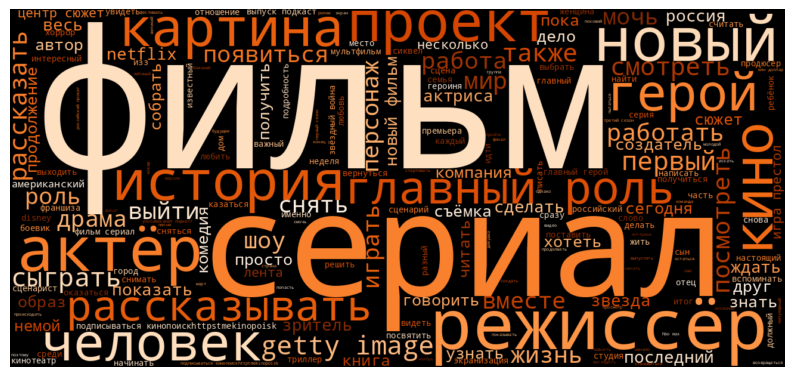

In [86]:
# объединили посты в одну переменную
word_cloud = ' '.join(posts['text'].tolist())

word_cloud = prepare_text(word_cloud)

# повторно удалилим (приведенные) стоп-слова из текста
word_cloud = [word for word in word_cloud if word.lower() not in russian_stopwords]

# соберем текст
word_cloud_text = ' '.join(word_cloud)

# создание облака слов
wordcloud = WordCloud(width=1300, height=600, background_color='black', colormap='Oranges_r').generate(word_cloud_text)

# Отображение облака слов
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.savefig('word_cloud.png')
plt.show()

На данном изображении находятся слова, которые чаще других используются в публикациях канала и характеризуют его смысловую составляющую. К ним в первую очередь относятся слова, связанные с кино (фильи, сериал, режиссёр, актёр и др.). Также выделяются слова, несущие временную характеристику (проект, новый, история)

Создадим список из пятидесяти наиболее часто встречающихся слов на канале.

In [87]:
# создали словарь с частотой употребления слов в постах
fdist = FreqDist(word_cloud)

# выделили 50 наиболее часто встречающихся слов
fdist_top_50 = pd.DataFrame(fdist.items(), columns=['word', 'frequency']).sort_values(by='frequency',ascending=False)[:50]
fdist_top_50.head(10)

,word,frequency
25,фильм,11586
7,сериал,6629
198,новый,6128
4,первый,3637
97,режиссёр,3489
90,главный,3301
561,роль,3216
588,выйти,2931
1264,проект,2639
819,сезон,2630


In [88]:
# создали список с наиболее часто встречающимися словами
top_50_word = fdist_top_50['word'].to_list()

In [89]:
# функция для подсчета популярных слов в посте
def count_popular_words(text, words):
    list = []
    prepare_text(text)
    for w in words:
        if w in text:
            list.append(w)
    return len(list)

Создадим столбец `popular_word_count`, куда сохраним количество популярных слов в посте

In [90]:
# количество популярных слов в посте
posts['popular_word_count'] = posts['text'].apply(lambda x: count_popular_words(x, top_50_word))

### 4.4 Объем текста
Вычислим объем текста - посчитаем количество символов в каждой публикации. Мы предполагаем, что на читателя оказывает влияние не только буквы и цифры, а полный объем текста, включая пробелы и символы.  
Вычисленную величину занесем в столбец `simbols_in_text`

In [91]:
for i in tqdm(posts['text']):
    result = len(re.findall(r'.', i))
    posts.loc[(posts['text'] == i), 'simbols_in_text'] = len(re.findall(r'.', i))
    posts.loc[(posts['text'] == i), 'words_in_text'] = len(re.findall(r'\w*', i))

100%|██████████| 23326/23326 [02:43<00:00, 142.90it/s]


Вычислим среднюю длину слова в каждом посте.

In [92]:
posts['avg_word_len'] = round((posts['simbols_in_text'] / posts['words_in_text']),1)

In [93]:
posts['avg_word_len'].describe()

count    23326.000000
mean         2.878856
std          0.274522
min          0.500000
25%          2.700000
50%          2.900000
75%          3.000000
max          4.800000
Name: avg_word_len, dtype: float64

Мы увидим, что средняя длина слова имеет медианного значение равное 2.9, а максимальное - 4.8. Эти цифры вызывают недоверие.  
Мы предположим, что дело здесь оказывают влдияние предлоги (короткие слова).  

Не поленимся и сформируем столбец `text_cloud`, в который запишем "очищенные "слова.


Обработаем текст в столбце `text`

In [94]:
# функция для подсчета слов
def lets_clearn(file_name, column_name):
    for i in tqdm(posts['text']):
        # объединили посты в одну переменную
        text = ' '.join(posts.loc[(posts['text'] == i), 'text'].tolist())

        # применим функцию для обработки
        filtered_text = prepare_text(text)

        # соберем текст
        filtered_text = ' '.join(filtered_text)
        #print("\033[34m""\033[1m"'НОВЫЙ ТЕКСТ'"\033[00m", filtered_text)

        # перезапишем в столбцы 'simbols_in_text' и 'words_of_text' новые значения, исходя из обработанного текста
        posts.loc[(posts['text'] == i), 'simbols_in_text'] = len(re.findall(r'.', filtered_text))
        posts.loc[(posts['text'] == i), 'words_in_text'] = len(re.findall(r'\w*', filtered_text))

    return

In [95]:
lets_clearn(posts, 'text')

100%|██████████| 23326/23326 [08:37<00:00, 45.03it/s]


In [96]:
posts['avg_word_len'] = round((posts['simbols_in_text'] / posts['words_in_text']),1)

In [97]:
posts['avg_word_len'].describe()

count    23326.000000
mean         4.831664
std          1.171346
min          0.500000
25%          4.100000
50%          4.600000
75%          5.200000
max         26.000000
Name: avg_word_len, dtype: float64


<div style="border-radius: 45px;border:solid green 7px; padding: 40px">
    
И теперь средняя длина слова имеет медианное значение, равное 4.6 (было - 2.9), а максимальное - 26 (было - 4.8).   
Мы сможем в дальнейшем провести анализ популярности публикаций в зависимости от средней длины слова в публикации.


### 4.5 Знаки препинания (сложность текста)
Для каждой публикации определим сложность восприятия текста.  
Примем посыл, что чем длиннее строятся предложения - тем сложнее пользователю их читать.  
Как правило, длинные предложения содержать причастные, деепричастные обороты, содержать отсылки и расшифровки. Все это оформляется знаками препинания: запятыми, тире, двоеточиями, точками с запятой.  
Посчитаем для каждой публикации количество знаков препинания. Исключим из подсчетов точку и знаки восклицательный и вопросительный - поскольку именно ими разграничиваются предложения. Чем больше точек - тем короче предложения - тем проще текст.


1) Создадим новый столбец `punct_marks` и запишем в него количество знаков препинания (за исключением точки и знаков восклицательного и вопросительного)

In [98]:
for i in tqdm(posts['text']):
    result = len(re.findall(r'[,;-]', i)) + len(re.findall(r'[:]', i))
    posts.loc[(posts['text'] == i), 'punct_marks'] = result


100%|██████████| 23326/23326 [01:17<00:00, 302.72it/s]


2) Рассчитаем количество слов, которые в каждой публикации приходится на один знак препинания. Результат запишем в столбец `marks_per_text`

In [99]:
posts['marks_per_text'] = round(posts['words_in_text'] / posts['punct_marks'] )

In [100]:
posts['marks_per_text']

0        11.0
1        16.0
2        11.0
3        11.0
4        12.0
         ... 
23321     8.0
23322     4.0
23323    16.0
23324    13.0
23325    16.0
Name: marks_per_text, Length: 23326, dtype: float64

3) Добавим столбец с долей популярных слов в посте

In [101]:
# доля популярных слов в посте
posts['popular_word_percent'] = round((posts['popular_word_count']/posts['words_in_text']*100),2)

In [102]:
posts['popular_word_percent']

0        1.75
1        2.14
2        3.89
3        2.50
4        2.78
         ... 
23321    1.79
23322    0.00
23323    4.84
23324    2.63
23325    0.76
Name: popular_word_percent, Length: 23326, dtype: float64

5) Добавим столбцы, указывающие на то или иное время публикации.
Добавим столбцы`year`, `month` и `weekday` для даты публикации поста.  
Понедельник — день под номером 0, а воскресенье — шестой день.  
И добавим столбец `weekday_name` с указанием названия дня недели.

In [103]:
posts['year'] =  posts['date'].dt.year
posts['month'] =  posts['date'].dt.month
posts['weekday'] =  posts['date'].dt.weekday
posts['weekday_name'] =  posts['date'].dt.day_name()

6) Добавим столбец `times_of_day` (время суток) для даты публикации поста.

In [104]:
posts['hour'] = pd.DatetimeIndex(posts['date']).hour

In [105]:
def categorize_day_period(cheque):

    for cheq in range(len(posts)):
        if cheque < 6:
            return 'ночь'
        if cheque < 11:
            return 'утро'
        if cheque < 18:
            return 'день'
        else:
            return 'вечер'



In [106]:
posts['times_of_day'] = posts['hour'].apply(categorize_day_period)
posts.head()

,id,date,text,views,reactions,forwarded,reactions_count,comments,type_attachment,lenght,cong_coef,post_topic,comp_score,complexity,negative,...,negative_ratio,speech_ratio,popular_word_count,simbols_in_text,words_in_text,avg_word_len,punct_marks,marks_per_text,popular_word_percent,year,month,weekday,weekday_name,hour,times_of_day
0,37125,2024-01-21 11:02:21+00:00,Какими подростками были актеры из «Трудных под...,12744.0,"{'_': 'MessageReactions', 'results': [{'_': 'R...",12.0,57,5,пост с ссылкой,24,0.689862,"Ретроспектива, сюжеты, интервью",1.7,обычный,0.0,...,0.0,0.0,1,296.0,57.0,5.2,5.0,11.0,1.75,2024,1,6,Sunday,11,день
1,37121,2024-01-20 21:01:00+00:00,Фильм дня — [**«Дневник Бриджит Джонс»**](http...,49486.0,"{'_': 'MessageReactions', 'results': [{'_': 'R...",161.0,896,85,пост с фото,62,0.779958,Новости кинопроката,1.7,обычный,0.0,...,0.0,0.0,3,563.0,140.0,4.0,9.0,16.0,2.14,2024,1,5,Saturday,21,вечер
2,37120,2024-01-20 19:01:16+00:00,Кристоферу Нолану [вручат](https://www.hollywo...,53713.0,"{'_': 'MessageReactions', 'results': [{'_': 'R...",136.0,1782,68,пост с фото,83,0.600589,Новости кинопроката,1.9,обычный,0.0,...,0.0,0.0,7,895.0,180.0,5.0,17.0,11.0,3.89,2024,1,5,Saturday,19,вечер
3,37119,2024-01-20 17:20:04+00:00,Отгадайте фильм: в жизни грустной девочки появ...,55890.0,"{'_': 'MessageReactions', 'results': [{'_': 'R...",148.0,189,12,пост с ссылкой,36,0.867385,Новости кинопроката,2.2,обычный,0.0,...,0.0,0.0,2,394.0,80.0,4.9,7.0,11.0,2.50,2024,1,5,Saturday,17,день
4,37118,2024-01-20 13:48:48+00:00,Правда или фейк? 🧐\n\n#ДежурныйПоКинопоиску Се...,60348.0,"{'_': 'MessageReactions', 'results': [{'_': 'R...",27.0,210,3,пост с видео,16,0.642002,#Дежурныйпокинопоиску,1.2,легкий,0.0,...,0.0,0.0,1,218.0,36.0,6.1,3.0,12.0,2.78,2024,1,5,Saturday,13,день


### 4.6 Время жизни поста

Датафрейм `comm` содержит столбец с временем написания комментария.  
Датафрейм `posts` содержит столбец с временем написания поста.  
Определим время жизни поста как разницу между датой последнего комментария к посту и датой публикации поста.  
Объединим датафреймы `posts` и `comm`. Назовем сводный датафрейм `data`

In [107]:
data = posts.merge(comm, left_on = 'id', right_on = 'post_id' )
data.head(1)

,id,date,text,views,reactions,forwarded,reactions_count,comments,type_attachment,lenght,cong_coef,post_topic,comp_score,complexity,negative,...,simbols_in_text,words_in_text,avg_word_len,punct_marks,marks_per_text,popular_word_percent,year,month,weekday,weekday_name,hour,times_of_day,post_id,date_comment,text_comment
0,37068,2024-01-18 12:32:47+00:00,Как Джереми Аллен Уайт прошел путь от роли Лип...,79003.0,"{'_': 'MessageReactions', 'results': [{'_': 'R...",372.0,520,34,пост с ссылкой,29,0.657813,"Ретроспектива, сюжеты, интервью",2.4,обычный,5.0,...,363.0,63.0,5.8,7.0,9.0,3.17,2024,1,3,Thursday,12,день,37068,2024-01-18 12:34:31+00:00,От бесстыжих к медведю - так это скорее не пут...


Удалим столбец `post_id`

In [108]:
data = data.drop(columns=['post_id'])


Добавим колонку `days_cnt`и запишем в нее разницу в днях, прошедшую с даты публикации поста по дату реакции читателя

In [109]:
data['days_cnt'] = (data['date_comment'] - data['date'])/ np.timedelta64 ( 1 , 'D')

In [110]:
data['days_cnt']

0         0.001204
1         0.001539
2         0.001667
3         0.002627
4         0.003403
            ...   
139517    0.010313
139518    0.079074
139519    2.198125
139520    6.046204
139521    8.778345
Name: days_cnt, Length: 139522, dtype: float64

Значения получились дробные.  
Округлим в большую сторону, "к потолку"

In [111]:
for i in tqdm(range(data.shape[0])):
    data.loc[(data.index == i), 'days_cnt'] = math.ceil(data.loc[(data.index == i), 'days_cnt'])

100%|██████████| 139522/139522 [02:12<00:00, 1053.25it/s]


Проверим data['days_cnt']. Сгруппируем данные по столбцу id и в каждой группе определим максимальное значение в столбце days_cnt - это и будет время жизни поста

Сгруппируем данные по столбцу `id` и в каждой группе определим максимальное значение в столбце `days_cnt` - это и будет время жизни поста

In [112]:
data_days_cnt = data.groupby('id').agg({'days_cnt':'max'})
data_days_cnt

,days_cnt
id,
28701,9.0
28711,2.0
28712,3.0
28713,15.0
28714,1.0
...,...
37059,1.0
37060,2.0
37064,1.0


Объединим датафреймы `posts` и `data_days_cnt`. В результате в `posts` получим новую колонку `days_cnt`, содержащую время жизни поста в днях.

In [113]:
posts = posts.merge(data_days_cnt, on = 'id', how = 'left' )

In [114]:
posts['days_cnt'].describe()

count    3931.000000
mean       13.488425
std        39.067399
min         1.000000
25%         1.000000
50%         2.000000
75%         7.000000
max       452.000000
Name: days_cnt, dtype: float64

<div style="border-radius: 45px; border:solid green 7px; padding: 40px">

Отметим, что:
- количество полученных значений равно 3931, то есть не все посты имеют комментарии. **Посмотрим далее, что это за посты**    
- медианное время жизни поста - 2 дня
- в то же время среднее время жизни поста - 13,5 дней
- есть суперпост - длительность жизни которого составила 452 дня. Необходимо будет исследовать на выбросы.

### 4.7 Реакции

Введем относительные показатели, характеризующие реакции читателей. Воспользуемся рекомендациями [сайта otzyvmarketing.ru](https://otzyvmarketing.ru/articles/top-10-servisov-i-botov-analitiki-telegram-kanalov/) для описания ряда метрик:
-	1-Day Reach – показывает популярность поста в первые 24 часа после публикации;
-	VR (Visibility Rate) – оценивает видимость публикаций, т. е. количество подписчиков, увидевших пост;
-	ERR (Engagement Rate by Reach) – показывает вовлеченность аудитории, ее взаимодействие с контентом;
-	CCI (индекс цитирования) – оценивает авторитетность канала, как публика шэрит опубликованный контент по другим ТГ-каналам и соцсетям.
-	качество аудитории – процент «живых» подписчиков, читающих и комментирующих посты.


### 4.7.1 Доля количества комментариев от количества просмотров поста
Создадим столбец `comments_per_views`, в котором отобразим отношение количества комментариев к количеству просмотров поста. Для удобства восприятия представим данные в виде процентов

In [115]:
posts['comments_per_views'] = round((posts['comments'] / posts['views'])*100,3)

### 4.7.2 Доля количества реакций (эмодзи) от количества просмотров поста
Создадим столбец `reactions_per_views`, в котором отобразим отношение количества комментариев к количеству просмотров поста. Для удобства восприятия представим данные в виде процентов

In [116]:
posts['reactions_per_views'] = round((posts['reactions_count'] / posts['views'])*100,3)

### 4.7.3 Коэффициент вовлеченности аудитории ERR (`Engagement Rate by Reach`)
Возможно, в ходе исследования мы придем к выводу, что при эксплуатации удобно использовать один, а не два показателя популярности. С этой целью мы используем агрегированный показатель, который будет рассчитываться как количество комментариев с определенным удельным весом и количество реакций со своим удельным весом.  
И такой общепринятый показатель существует - это Коэффициент вовлеченности аудитории (Engagement Rate by Reach) — коэффициент, который показывает, сколько пользователей активно взаимодействуют с контентом в соцсетях: ставят лайки, комментируют, репостят или сохраняют публикации. Engagement rate выражается в процентах и позволяет оценить, насколько эффективны коммуникации через соцсети.

Но какую же величину весовых коэффициентов принять?  
Чуть ниже мы увидим, что комментарии пишут не более, чем 0,2% от прочитавших пост. А реакции(эмодзи) ставят примерно 2% от открывших пост. Предположим, что те, кто оставляет комментарии в тоже время ставят и эмодзи. Проведем небольшие вычисления и увидим, что комментарии составят около 10% от совместного количества комментариев и реакций.   
Мы не ограничились расчетами и совместно с маркетологами команды было принято решение об использовании агрегированной метрики для оценки эффективности публикации. Мы считаем, что вес комментария в данной метрике составляет 90%, так как его написание занимает у людей больше времени, вовлекает его во взаимодействие с контентом в большей степени, а также комментарии интереснее для анализа. Вес реакция соответственно составит 10%.

Примем обратную зависимость и установим весовой коэффициент для комментариев, равный 90%, а для реакций - 10%.

Создадим:
- столбец `engagement_rate` как сумма относительного количества комментариев с удельным весом 0,90 и относительного количества  реакций с удельным весом 0,10.  


In [117]:
posts['engagement_rate'] = posts['comments_per_views'] * 0.9 + \
                           posts['reactions_per_views'] * 0.1

###4.7.4 CCI (индекс цитирования).

Рассчитаем его как долю количества репостов (пересылок) от количества просмотров поста.

Создадим столбец `CCI`, в котором отобразим отношение количества репостов, пересылок к количеству просмотров поста. Для удобства восприятия представим данные в виде процентов

In [118]:
posts['cci'] = round((posts['forwarded'] / posts['views'])*100,3)

### 4.7.8 1-Day Reach

Показатель показывает популярность поста в первые 24 часа после публикации.

Рассчитаем его как ERR в 24 часа после публикации.
Создадим столбец `1_day_reach`, в котором отобразим ERR в 24 часа после публикации поста. Для удобства восприятия представим данные в виде процентов

In [119]:
#posts['1_day_reach'] = round((posts['engagement_rate'] )*100,3)

### 4.8 Результаты предобработки

Выгрузим датафрейм с полной информацией о постах канала в виде файла

In [122]:
os.mkdir('models')

In [123]:
posts.to_csv('models/processed_posts_2016_2024.csv')

## 5 Выводы и заключения

На этапе ознакомления и предобработки предоставленных данных:

- изучены 2 датафрейма, данные в которых достаточно "чистые" (практически нет пропусков и дубликатов),
- данные приведены к удобным для анализа форматам, наименования типа публикации были заменены на понятные для Заказчика значения,
- были выделены 12 тем публикаций
- опеределена сложность текста и тональность комментариев
- для понимания тематики канала, построено облако слов, из которого выделены 50 наиболее часто встречающихся,
- добавлены столбцы с объемом текста, количеством знаков препинания, количеством слов, которые в каждой публикации приходится на один знак препинания, средней длиной слова, количеством популярных слов в посте, с долей популяоных слов в посте, столбцы, указывающие на то или иное время публикации (год месяц, неделя, время суток), время жизни поста в днях,
- для анализа эффективности публикации были выбраны метрики: доля количества комментариев от количества просмотров поста, доля количества реакций (эмодзи) от количества просмотров поста, коэффициент вовлеченности (engagement rate), которые были рассчитаны и также добавлены в отдельные столбцы
- итоговый файл выгружен и готов для исследования.<br>
